In [2]:
# compare knn model and logistic model 
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
iris=load_iris()
x=iris.data
y=iris.target
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [4]:
xtrain, xtest, ytrain, ytest =train_test_split(x,y,random_state=5)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.predict(xtest)
ypred=knn.predict(xtest)
metrics.accuracy_score(ytest,ypred)

0.94736842105263153

In [5]:
# k-fold validation accuracy score

from sklearn.cross_validation import cross_val_score

In [6]:
knn2=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [7]:
scores.mean()

0.96666666666666679

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94000000000000006, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.9333333333

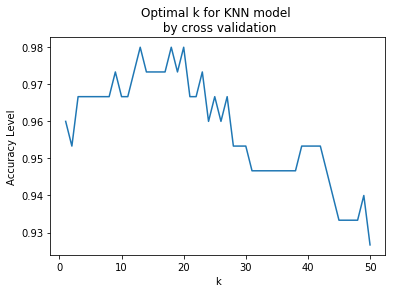

In [8]:
# based on the k-fold method find an optimal k
import matplotlib.pyplot as plt
%matplotlib inline
k_range = list(range(1,51))

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    scores.append(score.mean())
    
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Accuracy Level')
plt.title('Optimal k for KNN model \n by cross validation')

print(scores)
optimal_k=k_range[scores.index(max(scores))]

print ('The optimal k is',(optimal_k))

In [9]:
k_range=range(1,31)
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_score.append(score.mean())
print(k_score)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [10]:
#using 20 as the max accuracy level
knn= KNeighborsClassifier(n_neighbors=20)
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
score.mean()

0.98000000000000009

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg=LogisticRegression()
cross_val_score(logreg,x,y,cv=10,scoring='accuracy').mean()

0.95333333333333337

In [13]:
import pandas as pd
pima=pd.read_csv('diabetes.csv',header=0)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# can we predict diabetes given people's health measurement
feature_cols=['Pregnancies','Insulin','BMI','Age']
x=pima[feature_cols]
y=pima.Outcome

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
ypred_Class=logreg.predict(xtest)

In [17]:
#Classification accuracy: the percentage of correctly made prediction
#not useful if have highly biased distribution
metrics.accuracy_score(ytest,ypred_Class)
#null accuracy

0.69270833333333337

In [18]:
ytest.value_counts()
#real percentage of distribution

0    130
1     62
Name: Outcome, dtype: int64

In [19]:
ytest.mean()

0.3229166666666667

In [20]:
1-ytest.mean()

0.6770833333333333

In [21]:
# F1 score: F1= 2 * (1/(1/precision+1/recall)

In [25]:
max(ytest.mean(),1-ytest.mean())

0.6770833333333333

In [26]:
# print the first 25 true and predicted responses
print('true:',ytest.values[:25])


true: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]


In [29]:
print('pred:',ypred_Class[:25])

pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
# confusion matrix
# first argument is true values, second argument is predicted values
confusion=metrics.confusion_matrix(ytest,ypred_Class)
print(confusion)

[[118  12]
 [ 47  15]]


In [32]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [33]:
# classification accuracy: overall how often is the classifier correct?

(TP+TN)/(TP+TN+FP+FN)

0.69270833333333337

In [34]:
# classification error:
(FP+FN)/(TP+TN+FP+FN)

0.30729166666666669

In [35]:
# sensitivity (recall): when the actual value is positive, how often is the predition correct
print(TP/(TP+FN))
print(metrics.recall_score(ytest,ypred_Class))

0.241935483871
0.241935483871


In [36]:
# specificity: when the actual value is negative, how often is the prediction correct
TN/(TN+FP)

0.90769230769230769

In [37]:
# precision: when a positive value is predicted, how often is the prediction correct
print(TP/(TP+FP))
print(metrics.precision_score(ytest,ypred_Class))

0.555555555556
0.555555555556


In [38]:
# f1 score
metrics.f1_score(ytest,ypred_Class)

0.3370786516853933

In [39]:
print('true:',ytest.values[:25])
print('pred:',ypred_Class[:25])

true: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
# adjust the classification threshold - which is by default 0.5
# we no longer use 50% probability as threshold

logreg.predict(xtest)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [41]:
# print the first 10 predicted probability of class membership
logreg.predict_proba(xtest)[0:10]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [42]:
ypred_prob=logreg.predict_proba(xtest)

In [45]:
ypred_prob=logreg.predict_proba(xtest)[:,1]

In [46]:
#plot the distribution
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'frequencey')

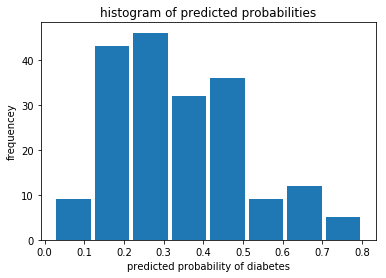

In [49]:
plt.hist(ypred_prob,rwidth=0.9,bins=8)
plt.title('histogram of predicted probabilities')
plt.xlabel('predicted probability of diabetes')
plt.ylabel('frequencey')

In [62]:
# a very small number of cases are predicted as 1 if we use 0.5 as threshold
# we should adjust threshold
# let's try 0.3
ypred_prob=logreg.predict_proba(xtest)
from sklearn.preprocessing import binarize
ypred_Class=binarize(ypred_prob,0.3)

In [63]:
# print the first 10 cases
# probabilities
# decision making output

print(ypred_prob[0:10])
print(ypred_Class[0:10])

[[ 0.63247571  0.36752429]
 [ 0.71643656  0.28356344]
 [ 0.71104114  0.28895886]
 [ 0.5858938   0.4141062 ]
 [ 0.84103973  0.15896027]
 [ 0.82934844  0.17065156]
 [ 0.50110974  0.49889026]
 [ 0.48658459  0.51341541]
 [ 0.72321388  0.27678612]
 [ 0.32810562  0.67189438]]
[[ 1.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  0.]
 [ 1.  1.]]


In [64]:
# we seem to imporve our prediction. let's do comparison

print(confusion)

[[118  12]
 [ 47  15]]


In [65]:
print(metrics.confusion_matrix(ytest,ypred_Class[:,1]))

[[80 50]
 [16 46]]


In [66]:
# sensitivity - used to be 0.24
46/(46+16)

0.7419354838709677

In [67]:
# f1 score
metrics.f1_score(ytest,ypred_Class[:,1])

0.58227848101265822